# Data Science Lab: Lab 4 - Nishaanth Joopelli, Daniel Kim, Farzaan Hussain

Submit:
1. A pdf of your notebook with solutions.
2. A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

1. Understanding Entropy
2. Scraping data.
3. Intro to Logistic Regression
4. Revisiting CIFAR-10 and MNIST.

## Problem 1 (Optional)

Read Shannon's 1948 paper 'A Mathematical Theory of Communication'. Focus on pages 1-19 (up to Part II), the remaining part is more relevant for communication.

https://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf


## Problem 2: (Optional) Scraping, Entropy and ICML papers

ICML -- the International Conference on Machine Learning -- is a top research conference in Machine learning. Scrape all the pdfs of all ICML 2021 papers from http://proceedings.mlr.press/v139/, and answer the following questions.

**Part 1.** What are the top 10 common words in the ICML papers?  

**Part 2.**  Let $Z$ be a randomly selected word in a randomly selected ICML paper. Estimate the entropy of $Z$.

**Part 3.**  Synthesize a random paragraph using the marginal distribution over words.

**Part 4.** Synthesize a random paragraph using an n-gram model on words. Synthesize a random paragraph using any model you want. We will learn more about generating text in later classes when we get into NLP.

Note: downloading may take some time.

## Problem 3: Logistic Regression

The following is a logistic regression problem using a real data set, made available by the authors of the book ``Applied Regression and Muiltilevel Modeling'' by Gelman and Hill.

Download the data from the book, which you can find here http://www.stat.columbia.edu/~gelman/arm/software/. In particular, we are interested in the **arsenic** data set. The file **wells.dat** contains data on 3,020 households in Bangladesh. For each family, the natural arsenic level of each well was measured. In addition, the distance to the nearest safest well was measured. Each family is also described by a feature that relates to their community involvement, and a feature that gives the education level of the head of household. We are interested in building a model that predicts whether the family decided to switch wells or not, based on being informed of the level of arsenic in the well. Thus the "label" for this problem is the binary vector that is the first column of the dataset, labeled "switch."

**Part 1.** Fit a logistic regression model using only an offset term and the distance to the nearest safe well.

**Part 2.** Plot your answer: that is, plot the probability of switching wells as a function of the distance to the nearest safe well.

**Part 3.** Interpreting logistic regression coefficients: Use the "rule-of-4" discussed in class, to interpret the solution: what can you say about the change in the probability of switching wells, for every additional 100 meters of distance?

**Part 4.** Now solve a logistic regression incorporating the constant term, the distance and also arsenic levels. Report the coefficients

**Part 5.** Next we want to answer the question of which factor is more significant, distance, or arsenic levels? This is not a well specified question, since these two features have different units. One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger change in probability of switching wells, than moving one unit in the other (also normalized) feature. Use this reasoning to answer the question.

**Part 6.** Now consider all the features in the data set. Also consider adding interaction terms among all features that have a large main effect. Use cross validation to build the best model you can (using your training set only), and then report the test error of your best model. (Note that since you have essentially unlimited access to your test set, this opens the door for massive overfitting. In contrast, Kaggle competitions try to mollify this by giving you only limited access to the test set.)

**Part 7.** (Optional) Now also play around with $\ell_1$ and $\ell_2$ regularization, and try to build the most accurate model you can (accuracy computed on the test data).

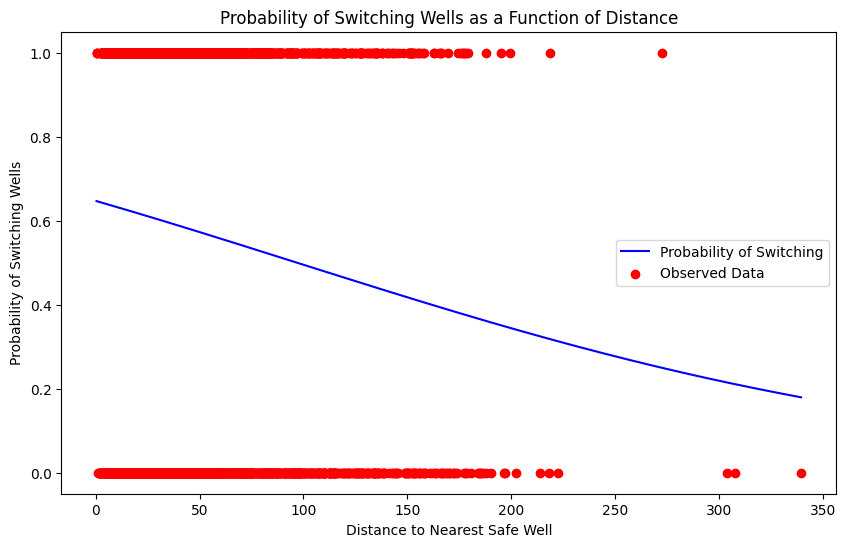

In [2]:
# Part 1 and Part 2
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Get data for wells
wells = pd.read_csv("arsenic/wells.dat", sep=r'\s+', index_col=0)

# Extracts dist and switch columns
X = wells[['dist']].to_numpy()
y = wells['switch'].to_numpy()

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the logistic model to data
model = LogisticRegression()
model.fit(X_train,y_train)

# Create a range of distance values for plotting
distance_values = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predict the probability of switching wells using the logistic model
predicted_probabilities = model.predict_proba(distance_values)[:, 1]

#Plot the 
plt.figure(figsize=(10, 6))
plt.plot(distance_values, predicted_probabilities, color='blue', label='Probability of Switching')
plt.scatter(X, y, color='red', label='Observed Data')
plt.xlabel('Distance to Nearest Safe Well')
plt.ylabel('Probability of Switching Wells')
plt.title('Probability of Switching Wells as a Function of Distance')
plt.legend()
plt.show()

In [3]:
# Part 3
distance_coefficient = model.coef_[0][0]
rule_of_four = distance_coefficient / 4
distance_change = 100
print(f"Probability of switching wells for every 100 meters of distance: {rule_of_four * distance_change}")

Probability of switching wells for every 100 meters of distance: -0.1565491925263146


In [4]:
# Part 4
# Extracts
X = wells[['dist', 'arsenic']].to_numpy()
y = wells['switch'].to_numpy()

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the logistic model to data
model2 = LogisticRegression()
model2.fit(X_train,y_train)

# Retrieve the coefficients
intercept = model2.intercept_[0]
dist_coef = model2.coef_[0][0]
arsenic_coef = model2.coef_[0][1]

# Report the coefficients
print(f"Intercept (b): {intercept:.4f}")
print(f"Distance Coefficient (w1): {dist_coef:.4f}")
print(f"Arsenic Coefficient (w2): {arsenic_coef:.4f}")

Intercept (b): 0.0143
Distance Coefficient (w1): -0.0090
Arsenic Coefficient (w2): 0.4512


In [7]:
# Part 5
from sklearn.preprocessing import StandardScaler

# Extract features and target variable
X = wells[['dist', 'arsenic']].to_numpy()
y = wells['switch'].to_numpy()

# Normalize the features by respective standard deviations
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_normalized, y)

# Retrieve coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Compare absolute values of coefficients
abs_coefficients = np.abs(coefficients)
most_significant_factor = ""
if (abs_coefficients[0] > abs_coefficients[1]):
    most_significant_factor = "distance"            # Since we did X = wells[['dist', 'arsenic']].to_numpy() distance will be in index 0 and arsenic level will be in index 1
elif (abs_coefficients[1] > abs_coefficients[0]):
    most_significant_factor = "arsenic"
else:
    most_significant_factor = "None both same significance"

print(f"Most Significant Factor: {most_significant_factor}")

Most Significant Factor: arsenic


In [42]:
# Part 6 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Load the data
wells = pd.read_csv("arsenic/wells.dat", sep=r'\s+', index_col=0)

# Extract features and target variable
X = wells[['dist', 'arsenic', 'assoc', 'educ']].to_numpy()  # Add all relevant features
y = wells['switch'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit an initial logistic regression model to determine coefficients with large main effect
initial_model = LogisticRegression()
initial_model.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = initial_model.coef_[0]
features = ['dist', 'arsenic', 'assoc', 'educ']

# Identify significant features (using an absolute value threshold)
threshold = 0.1 
significant_indexes = []
for i,feature in enumerate(abs(coefficients)):
    if feature > 0.1:
        significant_indexes.append(i)

# Generate interaction terms for significant features only
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train[:, significant_indexes])
X_test_interaction = poly.transform(X_test[:, significant_indexes])
num_significant = len(significant_indexes)
X_train_interaction = X_train_interaction[:, num_significant:]
X_test_interaction = X_test_interaction[:, num_significant:]

# Combine original features and interaction terms for X_train
X_train = np.hstack([X_train, X_train_interaction])
X_test = np.hstack([X_test, X_test_interaction])

# Initialize the logistic regression model with cross-validation
model = LogisticRegressionCV(cv=10, scoring='accuracy')

# Fit the model using cross-validation
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}\nTest Error: {1 - test_accuracy}")

Test Accuracy: 0.6175496688741722
Test Error: 0.3824503311258278


In [44]:
# Part 7 (attempt)
model_2 = LogisticRegression()

# Set up grid search for hyperparameter tuning
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']  # 'liblinear' supports L1
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs']  # 'lbfgs' supports L2
    }
]
grid_search = GridSearchCV(model_2, param_grid, cv=10, scoring='accuracy')

# Perform cross-validation to find the best model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test_Accuracy: {test_accuracy}\nTest Error: {1- test_accuracy}")

Test_Accuracy: 0.6043046357615894
Test Error: 0.39569536423841056


## Problem 4: Logistic Regression and CIFAR-10

In this problem you will explore the data set CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

**Part 1.** (Optional) You can read about the CIFAR-10 and CIFAR-100 data sets here: https://www.cs.toronto.edu/~kriz/cifar.html.

**Part 2.** (Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10 provided by them. Read here for a description: https://www.openml.org/d/40926.

**Part 3.** Use the **fetch_openml** command from **sklearn.datasets** to import the CIFAR-10-Small data set. There are 20,000 data points. Do a train-test split on 3/4 - 1/4.

**Part 4.** Figure out how to display some of the images in this data set, and display a couple. While not high resolution, these should be recognizable if you are doing it correctly.

**Part 5.** You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (**multi_class='multinomial'**). Use cross validation to see how good your accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for $\ell_1$ and $\ell_2$ regularization (i.e., for the Lasso and Ridge penalties), which are naturally supported in **sklearn.linear_model.LogisticRegression**. I recommend you use the solver **saga**. Note that this is quite a large problem: $20,000$ data points, each of them $3,072$-dimensional. Report your training and test losses.

**Part 6.** How sparse can you make your solutions without deteriorating your testing error too much? Here, I am asking you to try to obtain a sparse solution that has test accuracy that is close to the best solution you found.


## Problem 5: Multi-class Logistic Regression -- Visualizing the Solution

You will repeat the previous problem but for the MNIST data set which you will find here: https://www.openml.org/d/554. As we have seen before, MNIST is a data set of handwritten digits, and is considered one of the "easiest" image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful.


**Part 1.** Use the **fetch_openml** command from to import the MNIST data set, and choose a reasonable train-test split.

**Part 2.** Again run multi-class logistic regression on these using the cross entropy loss, as you did above. Try to optimize the hyperparameters. Report your training and test loss.

**Part 3.** Choose an $\ell_1$ regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
**Part 4.** Note that in Logistic Regression, the coefficients returned (i.e., the $\beta$'s) are the same dimension as the data. Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the 10 classes. You should observe that, at least for the sparse solutions, these "kind of" look like the digits they are classifying.
